Text(0.5,1,'Contour plot')

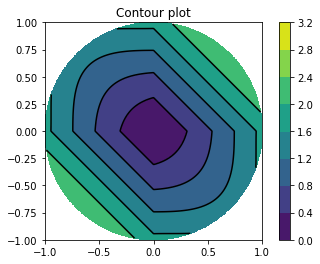

In [108]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import math

# Creating a Triangulation without specifying the triangles results in the
# Delaunay triangulation of the points.

# First create the x and y coordinates of the points.
n_angles = 48
n_radii = 8
min_radius = 1
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*math.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += math.pi/n_angles

x = np.linspace(-1, 1, 400)
y = np.linspace(-1, 1, 400)
X, Y = np.meshgrid(x,y)
z = (np.fabs(X) + np.fabs(Y) + np.power(np.sin(X + Y), 2)).flatten()

triang = tri.Triangulation(X.flatten(), Y.flatten())

xmid = X.flatten()[triang.triangles].mean(axis=1)
ymid = Y.flatten()[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid > min_radius*min_radius, 1, 0)
triang.set_mask(mask)

plt.figure()
plt.gca().set_aspect('equal')
plt.tricontourf(triang, z)
plt.colorbar()
plt.tricontour(triang, z, colors='k')
plt.title('Contour plot')
